# Imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Data Generation

In [7]:
import pandas as pd

clust_data = pd.read_csv('./data/cluster_ds.csv')
clust_data

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [12]:
clust_data.iloc[:,0]

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: INCOME, Length: 303, dtype: int64

In [52]:
def plot_data(data, size=2, color='k', marker='.'):
    plt.scatter(data.iloc[:,0], data.iloc[:,1], s=size, color=color, marker=marker)
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])

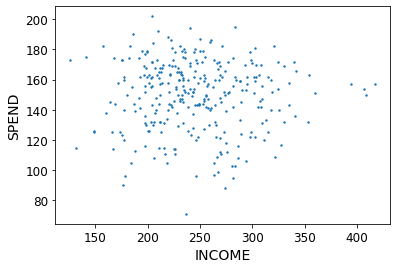

In [28]:
plot_data(clust_data)

**This scatter plot doesn't look to have any significant clusters or regression towards a trend, so *cluster analysis* and *regression* would not be the most helpful analysis. Instead *anomaly/outlier analysis* would be most suitable.**

# Outlier Analysis

In [30]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=1, n_init=10, random_state=42)
gm.fit(clust_data)

C:\Users\codeu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\codeu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\codeu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\codeu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

GaussianMixture(n_init=10, random_state=42)

In [34]:
def plot_centroids(centroids, weights=None):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
        
    plt.scatter(centroids[:,0], centroids[:,1],
                marker='o', s=35, linewidths=8,
                color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1],
                marker='x', s=2, linewidths=12,
                color='k', zorder=11, alpha=1)

In [35]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, data, resolution=1000):
    mins = data.min(axis=0) - 0.1
    maxs = data.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plot_data(data)
    plot_centroids(clusterer.means_, clusterer.weights_)

C:\Users\codeu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\codeu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\codeu\AppData\Local\Temp\ipykernel_11856\130184739.py:22: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z,


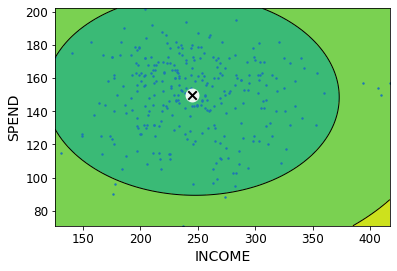

In [36]:
plot_gaussian_mixture(gm, clust_data)

In [56]:
densities = gm.score_samples(clust_data)
density_threshold = np.percentile(densities, 2)
anomalies = clust_data[densities < density_threshold]

C:\Users\codeu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\codeu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\codeu\AppData\Local\Temp\ipykernel_11856\130184739.py:22: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z,


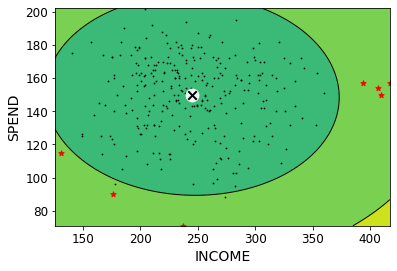

In [60]:
plot_gaussian_mixture(gm, clust_data)
plot_data(anomalies, color='r', marker='*', size=30)

In [61]:
anomalies

,INCOME,SPEND
28,417,157
96,394,157
220,407,154
246,409,150
272,237,71
297,176,90
301,131,115
